In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import cartopy.crs as ccrs
import gsw

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


from utils import *

In [2]:
ds = load_climatology_with_deptho().mean('month')
ds

<xarray.Dataset>
Dimensions:    (depth: 39, latitude: 121, longitude: 1440)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 370.7 411.8 457.6
  * latitude   (latitude) float32 60.0 60.25 60.5 60.75 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    S          (depth, latitude, longitude) float32 32.81 32.78 ... 34.88 34.88
    T          (depth, latitude, longitude) float32 4.76 4.75 ... 0.6087 0.6087
    SIC        (latitude, longitude) float32 0.01334 0.01525 ... 0.961 0.961
    SIT        (latitude, longitude) float32 0.01429 0.01605 ... 2.041 2.041
    U          (depth, latitude, longitude) float32 -0.01305 ... 4.343e-05
    V          (depth, latitude, longitude) float32 0.02546 ... 0.0003871
    SSH        (latitude, longitude) float32 -0.06958 -0.06587 ... -0.5998
    deptho     (latitude, longitude) float64 2.502e+03 2.01e+03 ... nan nan

## Greenland - Norway

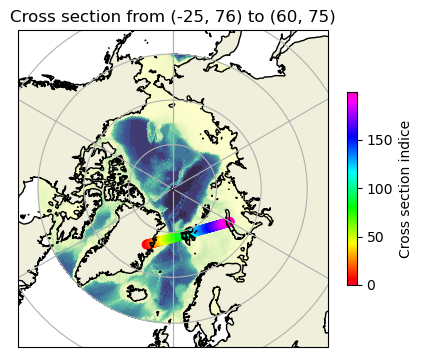

100%|██████████| 200/200 [00:02<00:00, 98.67it/s] 


<xarray.Dataset>
Dimensions:            (depth: 39, latitude: 200, cross_section_idx: 200,
                        longitude: 200, dist: 200)
Coordinates:
  * depth              (depth) float32 0.5058 1.556 2.668 ... 370.7 411.8 457.6
  * latitude           (latitude) float64 76.0 76.06 76.12 ... 75.13 75.07 75.0
  * longitude          (longitude) float64 -25.0 -24.69 -24.37 ... 59.73 60.0
  * dist               (dist) float64 0.0 34.04 68.09 ... 6.741e+03 6.775e+03
Dimensions without coordinates: cross_section_idx
Data variables:
    S                  (cross_section_idx, depth) float32 nan nan ... nan nan
    T                  (cross_section_idx, depth) float32 nan nan ... nan nan
    SIC                (cross_section_idx) float64 nan nan nan ... nan nan nan
    SIT                (cross_section_idx) float64 nan nan nan ... nan nan nan
    U                  (cross_section_idx, depth) float32 nan nan ... nan nan
    V                  (cross_section_idx, depth) float32 nan nan ... nan nan
    SSH                (cross_section_idx) float64 nan nan nan ... nan nan nan
    deptho             (cross_section_idx) float64 nan nan nan ... nan nan nan
    normal_meridional  (cross_section_idx) float64 0.9811 0.9814 ... 0.971
    normal_zonal       (cross_section_idx) float64 -0.1935 -0.1921 ... 0.239

In [3]:
lat1, lon1 = (76, -25)
lat2, lon2 = (75, 60)

cs_ds = cross_section(ds, lon1, lat1, lon2, lat2, 200)
cs_ds

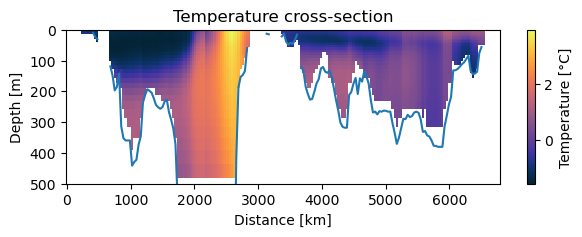

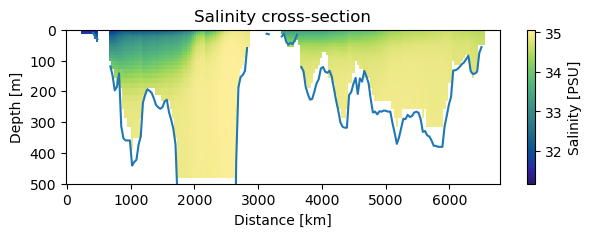

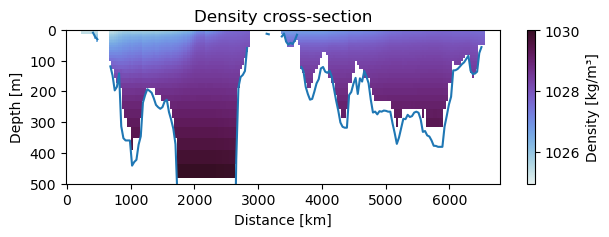

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['T'].values.T, cmap=cmo.thermal)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Temperature [°C]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Temperature cross-section')
plt.show()

# Salinity
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['S'].values.T, cmap=cmo.haline)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Salinity [PSU]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Salinity cross-section')
plt.show()


# Density
cs_ds['rho'] = xr.apply_ufunc(gsw.rho_t_exact, cs_ds['S'], cs_ds['T'], cs_ds.depth, dask='parallelized', output_dtypes=[float])
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['rho'].values.T, cmap=cmo.dense)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Density [kg/m³]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Density cross-section')
plt.show()

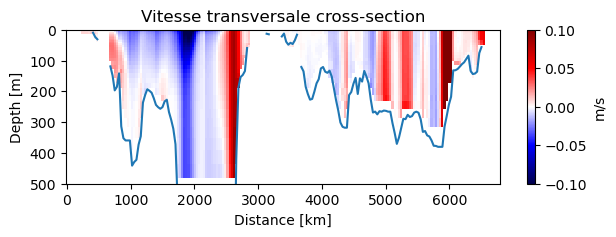

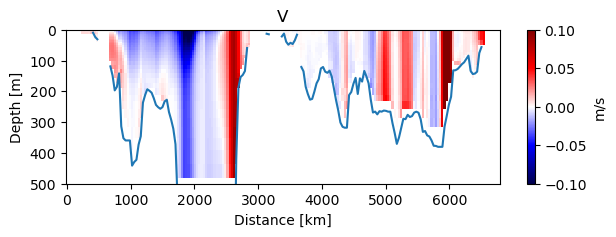

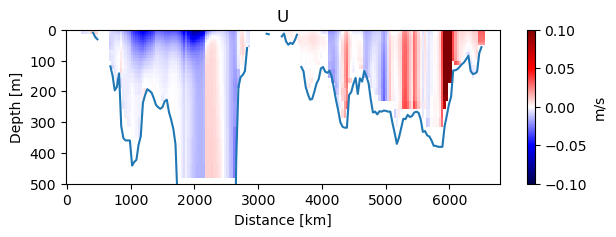

In [5]:

cmap_min = -0.1
cmap_max = +0.1

# Vitesse transversale
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, (cs_ds['V']*cs_ds.normal_meridional + cs_ds['U']*cs_ds.normal_zonal).values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Vitesse transversale cross-section')
plt.show()

# V
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['V'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('V')
plt.show()

# U
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['U'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('U')
plt.show()

## -90° 90 longitude

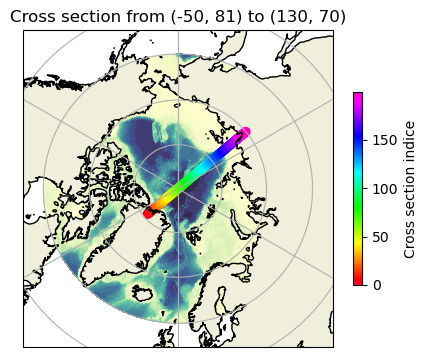

100%|██████████| 200/200 [00:02<00:00, 96.47it/s]


<xarray.Dataset>
Dimensions:            (depth: 39, latitude: 200, cross_section_idx: 200,
                        longitude: 200, dist: 200)
Coordinates:
  * depth              (depth) float32 0.5058 1.556 2.668 ... 370.7 411.8 457.6
  * latitude           (latitude) float64 81.0 81.15 81.29 ... 70.29 70.15 70.0
  * longitude          (longitude) float64 -50.0 -50.0 -50.0 ... 130.0 130.0
  * dist               (dist) float64 0.0 50.65 101.3 ... 1.003e+04 1.008e+04
Dimensions without coordinates: cross_section_idx
Data variables:
    S                  (cross_section_idx, depth) float32 nan nan ... nan nan
    T                  (cross_section_idx, depth) float32 nan nan ... nan nan
    SIC                (cross_section_idx) float64 nan nan nan ... nan nan nan
    SIT                (cross_section_idx) float64 nan nan nan ... nan nan nan
    U                  (cross_section_idx, depth) float32 nan nan ... nan nan
    V                  (cross_section_idx, depth) float32 nan nan ... nan nan
    SSH                (cross_section_idx) float64 nan nan nan ... nan nan nan
    deptho             (cross_section_idx) float64 nan nan nan ... nan nan nan
    normal_meridional  (cross_section_idx) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    normal_zonal       (cross_section_idx) float64 -1.0 -1.0 -1.0 ... 1.0 1.0

In [6]:
lat1, lon1 = (81, -180+130)
lat2, lon2 = (70, 130)

cs_ds = cross_section(ds, lon1, lat1, lon2, lat2, 200)
cs_ds


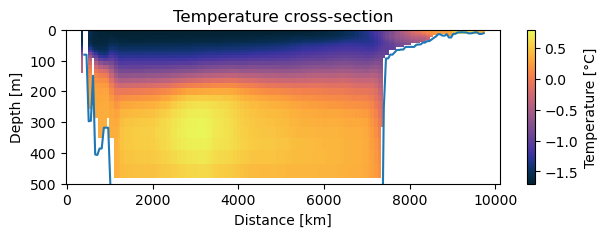

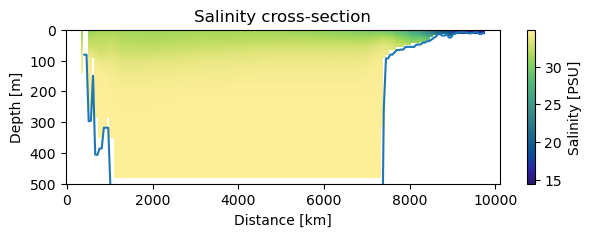

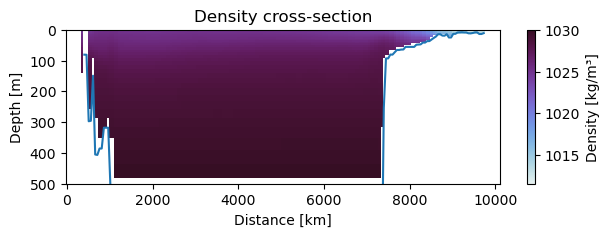

In [7]:
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['T'].values.T, cmap=cmo.thermal)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Temperature [°C]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Temperature cross-section')
plt.show()

# Salinity
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['S'].values.T, cmap=cmo.haline)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Salinity [PSU]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Salinity cross-section')
plt.show()


# Density
cs_ds['rho'] = xr.apply_ufunc(gsw.rho_t_exact, cs_ds['S'], cs_ds['T'], cs_ds.depth, dask='parallelized', output_dtypes=[float])
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['rho'].values.T, cmap=cmo.dense)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Density [kg/m³]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Density cross-section')
plt.show()

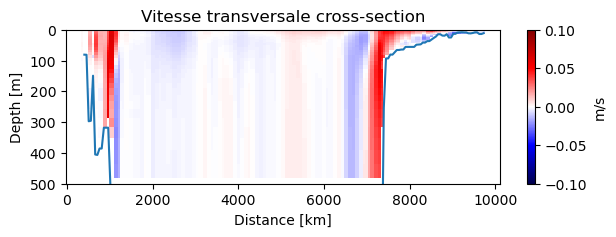

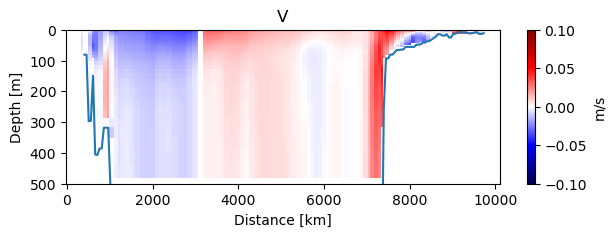

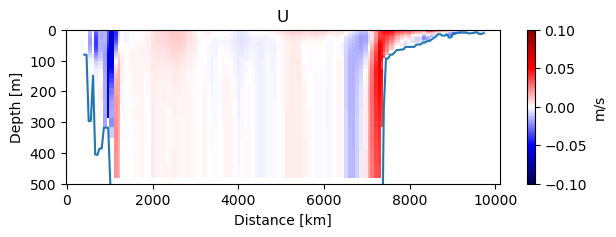

In [8]:

cmap_min = -0.1
cmap_max = +0.1

# Vitesse transversale
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, (cs_ds['V']*cs_ds.normal_meridional + cs_ds['U']*cs_ds.normal_zonal).values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Vitesse transversale cross-section')
plt.show()

# V
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['V'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('V')
plt.show()

# U
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['U'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('U')
plt.show()

## Gyre de Beaufort

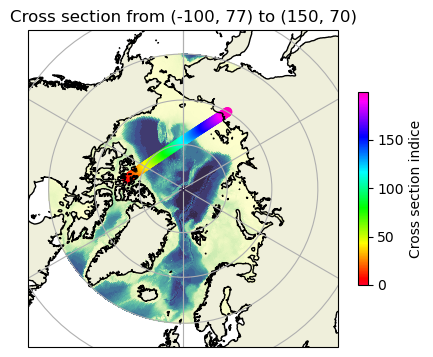

100%|██████████| 200/200 [00:02<00:00, 97.75it/s] 


<xarray.Dataset>
Dimensions:            (depth: 39, latitude: 200, cross_section_idx: 200,
                        longitude: 200, dist: 200)
Coordinates:
  * depth              (depth) float32 0.5058 1.556 2.668 ... 370.7 411.8 457.6
  * latitude           (latitude) float64 77.0 77.1 77.19 ... 70.24 70.12 70.0
  * longitude          (longitude) float64 -100.0 -100.4 -100.9 ... 150.2 150.0
  * dist               (dist) float64 0.0 47.54 95.07 ... 9.412e+03 9.46e+03
Dimensions without coordinates: cross_section_idx
Data variables:
    S                  (cross_section_idx, depth) float32 30.34 30.41 ... nan
    T                  (cross_section_idx, depth) float32 -1.593 -1.585 ... nan
    SIC                (cross_section_idx) float64 0.8936 0.8974 ... nan nan
    SIT                (cross_section_idx) float64 2.372 2.407 2.437 ... nan nan
    U                  (cross_section_idx, depth) float32 0.005852 ... nan
    V                  (cross_section_idx, depth) float32 -0.01568 ... nan
    SSH                (cross_section_idx) float64 -0.5363 -0.5347 ... nan nan
    deptho             (cross_section_idx) float64 264.0 239.9 237.3 ... nan nan
    normal_meridional  (cross_section_idx) float64 -0.9756 -0.9761 ... -0.8377
    normal_zonal       (cross_section_idx) float64 -0.2197 -0.2174 ... 0.5461

In [12]:
lat1, lon1 = (77, -180+80)
lat2, lon2 = (70, 150)

cs_ds = cross_section(ds, lon1, lat1, lon2, lat2, 200)
cs_ds

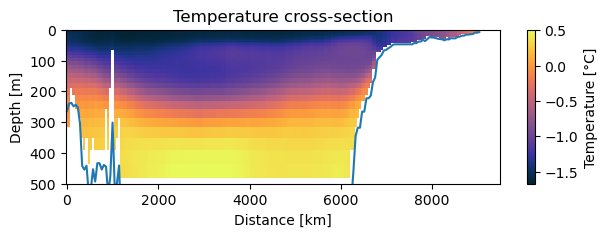

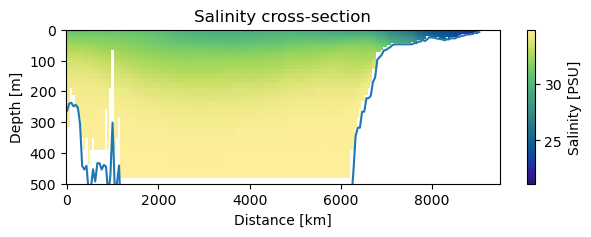

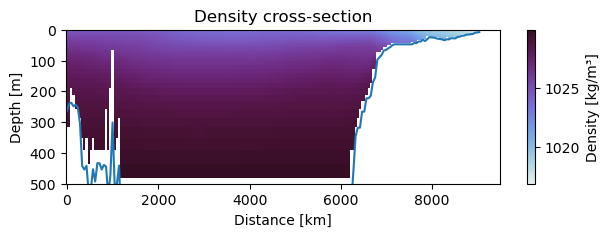

In [13]:
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['T'].values.T, cmap=cmo.thermal)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Temperature [°C]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Temperature cross-section')
plt.show()

# Salinity
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['S'].values.T, cmap=cmo.haline)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Salinity [PSU]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Salinity cross-section')
plt.show()


# Density
cs_ds['rho'] = xr.apply_ufunc(gsw.rho_t_exact, cs_ds['S'], cs_ds['T'], cs_ds.depth, dask='parallelized', output_dtypes=[float])
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['rho'].values.T, cmap=cmo.dense)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='Density [kg/m³]')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Density cross-section')
plt.show()

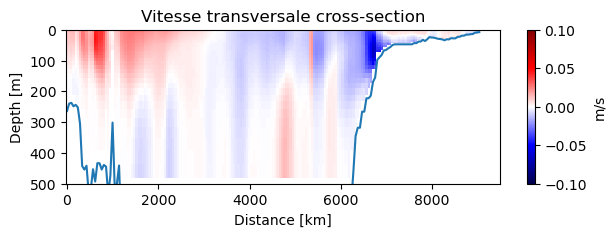

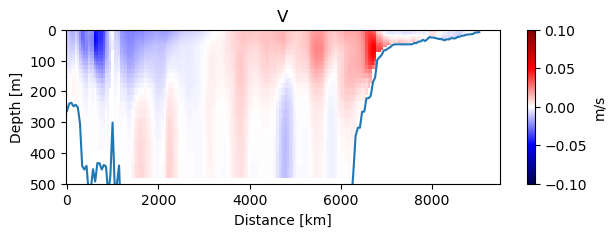

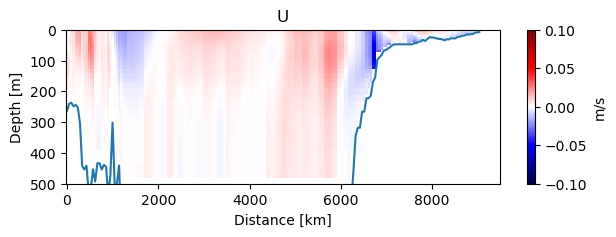

In [14]:

cmap_min = -0.1
cmap_max = +0.1

# Vitesse transversale
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, (cs_ds['V']*cs_ds.normal_meridional + cs_ds['U']*cs_ds.normal_zonal).values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('Vitesse transversale cross-section')
plt.show()

# V
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['V'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('V')
plt.show()

# U
fig, ax = plt.subplots(1,1,figsize=(7,2))
pc = ax.pcolormesh(cs_ds.dist, cs_ds.depth, cs_ds['U'].values.T, cmap='seismic',vmin=cmap_min,vmax=cmap_max)
ax.plot(cs_ds.dist, cs_ds['deptho'])
plt.colorbar(pc, ax=ax, label='m/s')
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_ylim(0,500)
ax.invert_yaxis()
ax.set_title('U')
plt.show()